In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Use a composed dataset from kaggle, join and cleanup the data (the requirements here is to open at least 2 files, it doesn’t matter if its csv or json)

The chosen dataset is [Mobile App Store](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps#AppleStore.csv) which is composed of two tables in csv (AppleStorce and appleStore_description). Below I am loading the tables via the read_csv method in pandas and allocating them in dataframes.

In [2]:
df1=pd.read_csv('AppleStore.csv')

appleStore.csv

    "id" : App ID
    "track_name": App Name
    "size_bytes": Size (in Bytes)
    "currency": Currency Type
    "price": Price amount
    "rating_count_tot": User Rating counts (for all version)
    "rating_count_ver": User Rating counts (for current version)
    "user_rating" : Average User Rating value (for all version)
    "user_rating_ver": Average User Rating value (for current version)
    "ver" : Latest version code
    "cont_rating": Content Rating
    "prime_genre": Primary Genre
    "sup_devices.num": Number of supporting devices
    "ipadSc_urls.num": Number of screenshots showed for display
    "lang.num": Number of supported languages
    "vpp_lic": Vpp Device Based Licensing Enabled

In [3]:
len(df1.index)

7197

In [4]:
df1.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [5]:
df2=pd.read_csv('appleStore_description.csv')

appleStore_description.csv

    id : App ID
    track_name: Application name
    size_bytes: Memory size (in Bytes)
    app_desc: Application description


In [6]:
len(df2.index)

7197

In [7]:
df2.head()

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,On more than 250 million devices around the wo...


Once we have checked that tables have the same length and that they share a column, we can proceed with the merging of both dataframes. We have chosen the "id" column to merge on.

In [8]:
mergedDf=pd.merge(df1, df2, on="id")

In [9]:
mergedDf.head(2)

,Unnamed: 0,id,track_name_x,size_bytes_x,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,track_name_y,size_bytes_y,app_desc
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...


We have a look at the result and its summary statistics

In [10]:
mergedDf.columns

Index(['Unnamed: 0', 'id', 'track_name_x', 'size_bytes_x', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic',
       'track_name_y', 'size_bytes_y', 'app_desc'],
      dtype='object')

In [11]:
mergedDf.dtypes

Unnamed: 0            int64
id                    int64
track_name_x         object
size_bytes_x          int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
track_name_y         object
size_bytes_y          int64
app_desc             object
dtype: object

In [12]:
mergedDf.describe()

,Unnamed: 0,id,size_bytes_x,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_bytes_y
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7.197000e+03
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053,1.991345e+08
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066,3.592069e+08
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,5.898240e+05
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000,4.692275e+07
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000,9.715302e+07
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000,1.819249e+08
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000,4.025970e+09


We decide that there is no need for some columns to remaing during the exercise since they will not be object of the study

In [13]:
mergedDf=mergedDf.drop(['Unnamed: 0','size_bytes_x','currency','track_name_y', 'vpp_lic', 'ipadSc_urls.num', "cont_rating"], axis=1)

We check that there is no nulls within our dataframe

In [14]:
null_cols = mergedDf.isnull().sum()
null_cols[null_cols > 0]

Series([], dtype: int64)

In [15]:
mergedDf.dtypes

id                    int64
track_name_x         object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
prime_genre          object
sup_devices.num       int64
lang.num              int64
size_bytes_y          int64
app_desc             object
dtype: object

We know that the price will be one of the most important columns we will be dealing with. So we have a deeper look at it

In [16]:
mergedDf['price'].value_counts()

0.00      4056
0.99       728
2.99       683
1.99       621
4.99       394
3.99       277
6.99       166
9.99        81
5.99        52
7.99        33
14.99       21
19.99       13
8.99         9
24.99        8
13.99        6
11.99        6
29.99        6
12.99        5
15.99        4
59.99        3
17.99        3
22.99        2
23.99        2
20.99        2
27.99        2
16.99        2
49.99        2
39.99        2
74.99        1
18.99        1
34.99        1
99.99        1
299.99       1
47.99        1
21.99        1
249.99       1
Name: price, dtype: int64

We concluded that we just want to work with apps that are nor free and whose price is less than 10 dollars. This is because we want to work with a range of prices that is more equally distributed and we have observed that this range includes enough apps

In [17]:
mergedDf=mergedDf.loc[(mergedDf["price"]<10) & (mergedDf["price"]>0)]

In [18]:
mergedDf['price'].value_counts()

0.99    728
2.99    683
1.99    621
4.99    394
3.99    277
6.99    166
9.99     81
5.99     52
7.99     33
8.99      9
Name: price, dtype: int64

## 2. At least 3 histograms on different aggregated data. Do an analysis on which is the optimal bin parameter (the one that maximizes clarity on specified insight). Keep an eye on the dataset you choose, it must have at least 3 numeric columns to operate.

The first parameter we will check is the price. We will use matplotlib histograms via pandas.

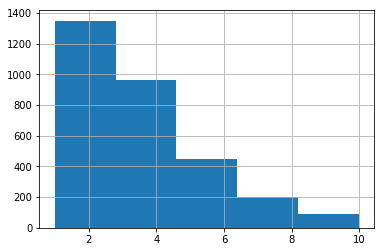

In [19]:
mergedDf['price'].hist(bins=5)

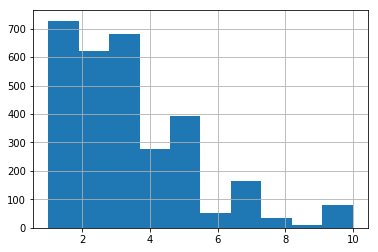

In [20]:
mergedDf['price'].hist(bins=10)

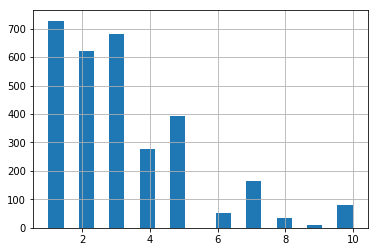

In [21]:
mergedDf['price'].hist(bins=20)

In this case, 10 bins would be the most appropiate number of bins to be applied since it gives a balance between accuracy and general observation

We will now check the lang.num, which refers to the number of languages the app is available in. We will use seaborn histograms this time.

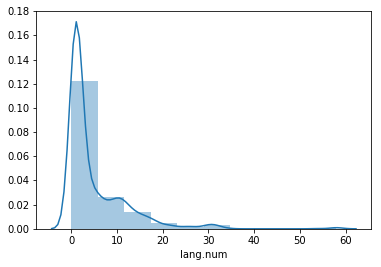

In [22]:
sns.distplot(mergedDf['lang.num'], hist=True, bins=10)

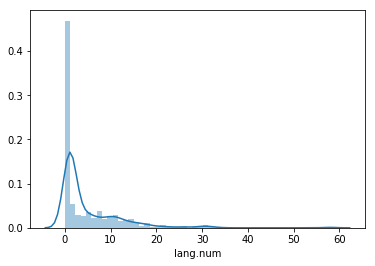

In [23]:
sns.distplot(mergedDf['lang.num'], hist=True, bins=50)

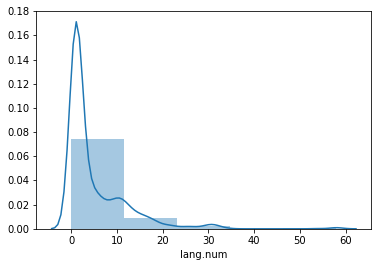

In [24]:
sns.distplot(mergedDf['lang.num'], hist=True, bins=5)

In this case, 10 bins is again the most appropiate number

At last, we will study the results for the sup_devices_num or the number of supported devices. We are now using subplots from  matplotlib

(array([1.000e+00, 6.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+02, 3.400e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 1.400e+01, 1.239e+03, 7.300e+02, 4.970e+02, 2.870e+02,
        7.000e+00, 2.400e+01]),
 array([11. , 12.8, 14.6, 16.4, 18.2, 20. , 21.8, 23.6, 25.4, 27.2, 29. ,
        30.8, 32.6, 34.4, 36.2, 38. , 39.8, 41.6, 43.4, 45.2, 47. ]),
 <a list of 20 Patch objects>)

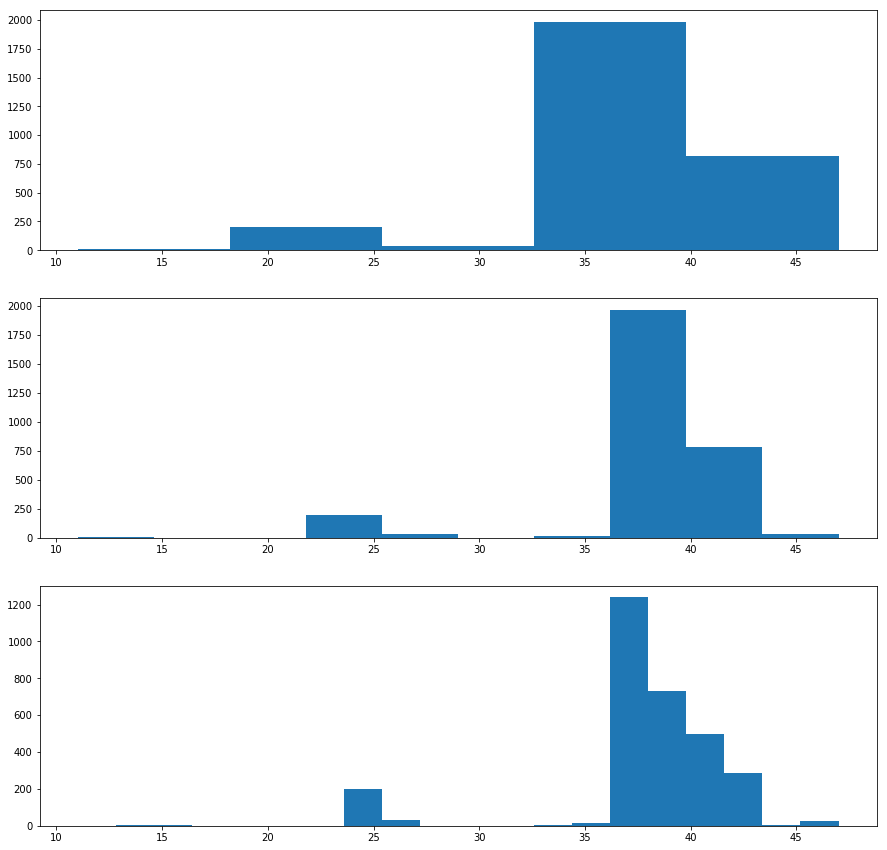

In [25]:
fig, axes = plt.subplots(3,1, figsize=(15,15))
axes[0].hist(mergedDf['sup_devices.num'], bins=5)
axes[1].hist(mergedDf['sup_devices.num'], bins=10)
axes[2].hist(mergedDf['sup_devices.num'], bins=20)

In this case, I believe 5 bins would be the most appropiate

## 3. Plot a scatter distribution of data for a joined column with any column you like

The only numeric joined column we have is the "size_bytes_y" that we will cross with the "rating_count_tol" in order to build a scatter plot.

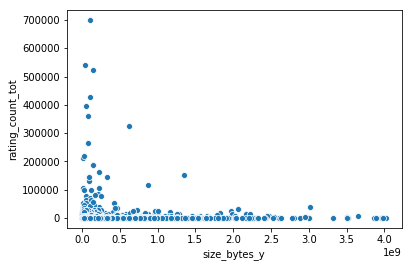

In [26]:
sns.scatterplot(x=mergedDf['size_bytes_y'], y=mergedDf['rating_count_tot'])

## 4. Create a combined scatterplot with a two series you choosed, it should contain the legend for each scatterplot

The diagram will show both the total count of ratings and the count of ratings per version against the size in bytes of the app.

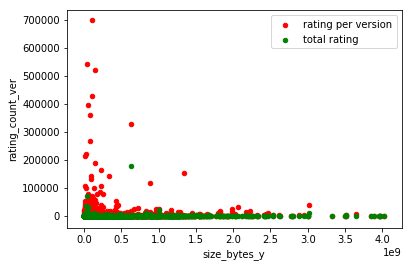

In [27]:
ax1 = mergedDf.plot(kind='scatter', x='size_bytes_y', y='rating_count_tot', color='r', label="rating per version")    
ax2 = mergedDf.plot(kind='scatter', x='size_bytes_y', y='rating_count_ver', color='g', label="total rating", ax=ax1)    


## 5. Create a plot for a category distribution (using seaborn violin plot o other kind of graph that fits better your data using catplot) 

Below we have used a catplot to represents all violin diagrams by primer genre

In [28]:
#Not sure how to change the titles in the axis to look bigger...itś quite difficult to read

/home/albertocastellanos/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


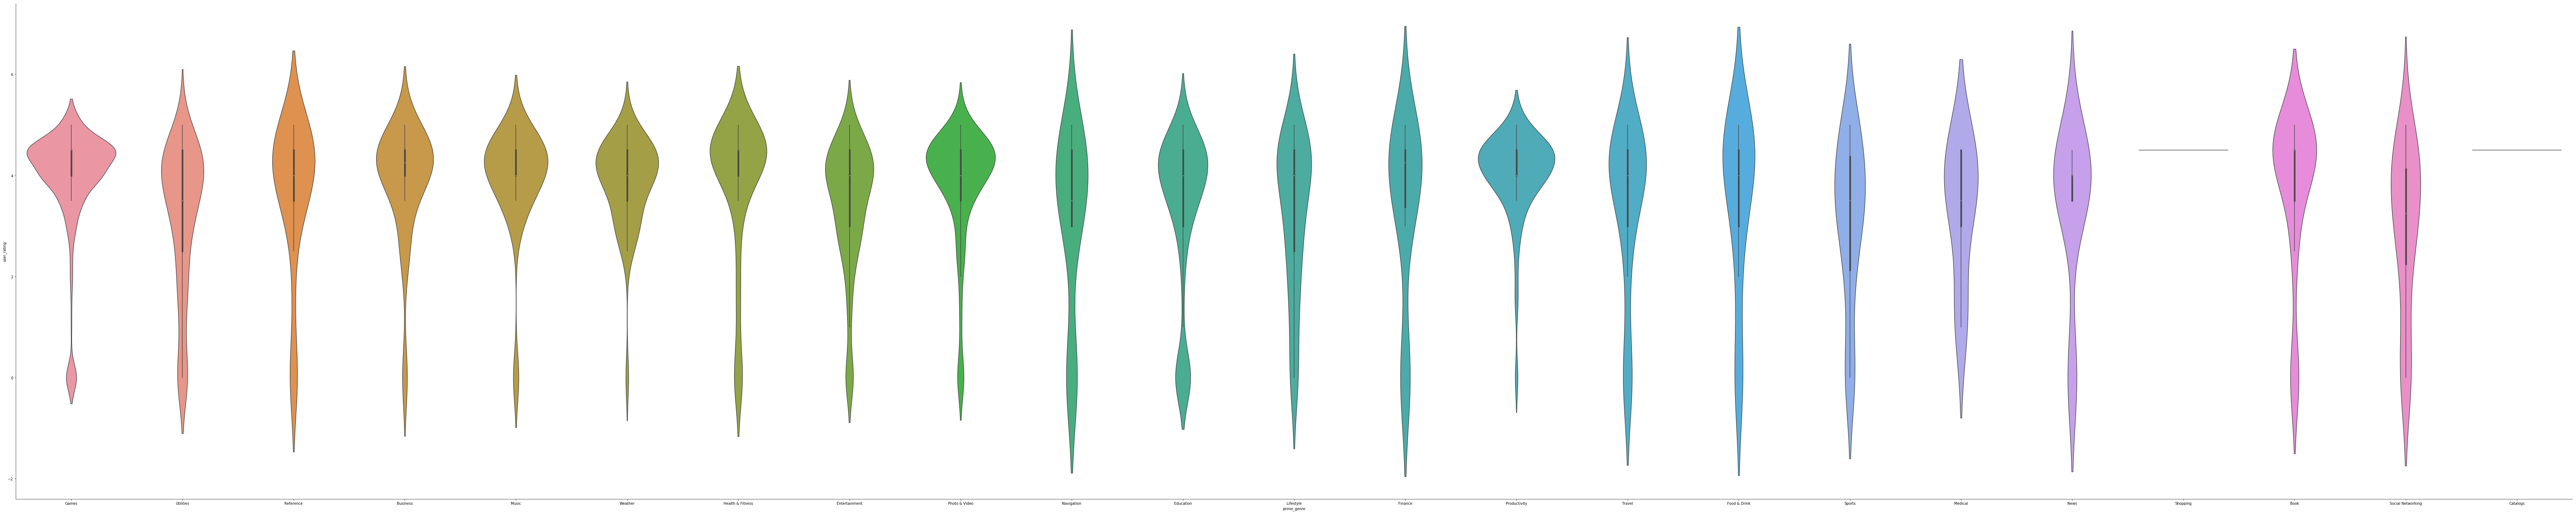

In [29]:
sns.catplot(x='prime_genre', y='user_rating' ,data=mergedDf, kind='violin',height=20, aspect=5)

## 6. Do a comparision with 3x3 subplot matrix. Plots can be anything you liked about the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70c6aa90b8>,
      dtype=object)

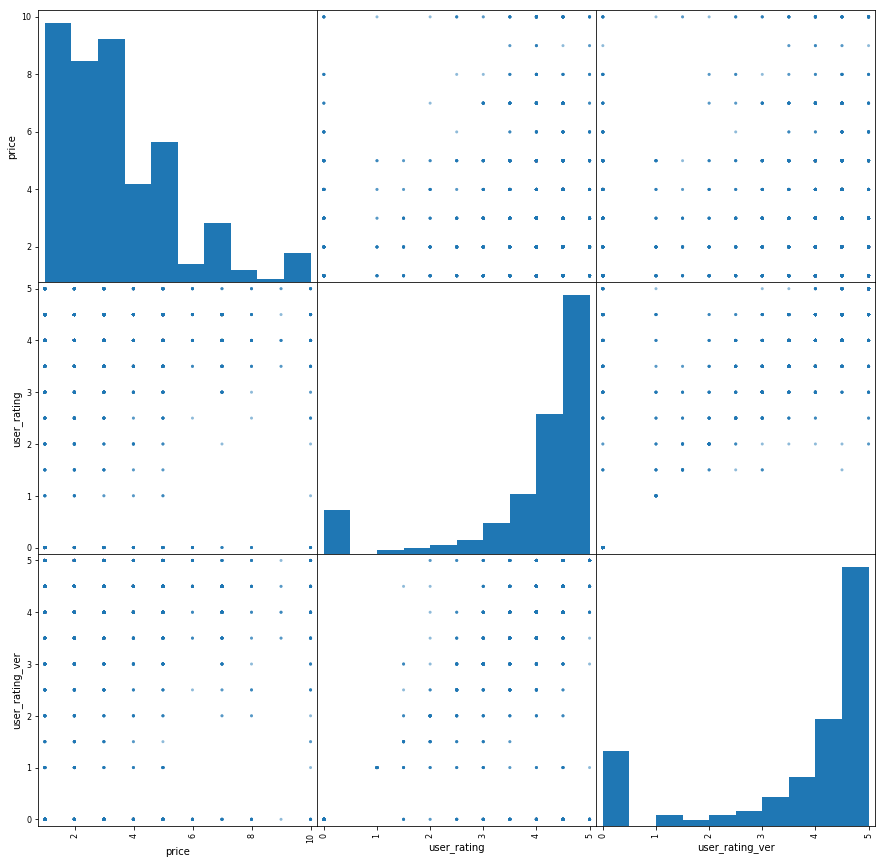

In [30]:
pd.plotting.scatter_matrix(mergedDf[['price', 'user_rating','user_rating_ver']], figsize=(15,15))